In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [8]:
startup = pd.read_csv('E:/data science/Assignments_Data_science/Multi linear regression/50_Startups.csv')
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [9]:
startup.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [11]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [69]:
startup1=startup.rename({'R&D Spend': 'RDS', 'Administration': 'ADMS','Marketing Spend': 'MS'},axis=1)

In [70]:
startup1[startup1.duplicated()] #No duplicates found 

,RDS,ADMS,MS,State,Profit


In [71]:
startup1.describe()

,RDS,ADMS,MS,State,Profit
count,50.000000,50.000000,50.000000,0.0,50.000000
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500
max,165349.200000,182645.560000,471784.100000,NaN,192261.830000


In [72]:
startup2= startup1.drop('State',axis=1)
startup2 #dropped State column

,RDS,ADMS,MS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


# Correlation Matrix

In [73]:
startup2.corr()

,RDS,ADMS,MS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot between variables along with histograms 

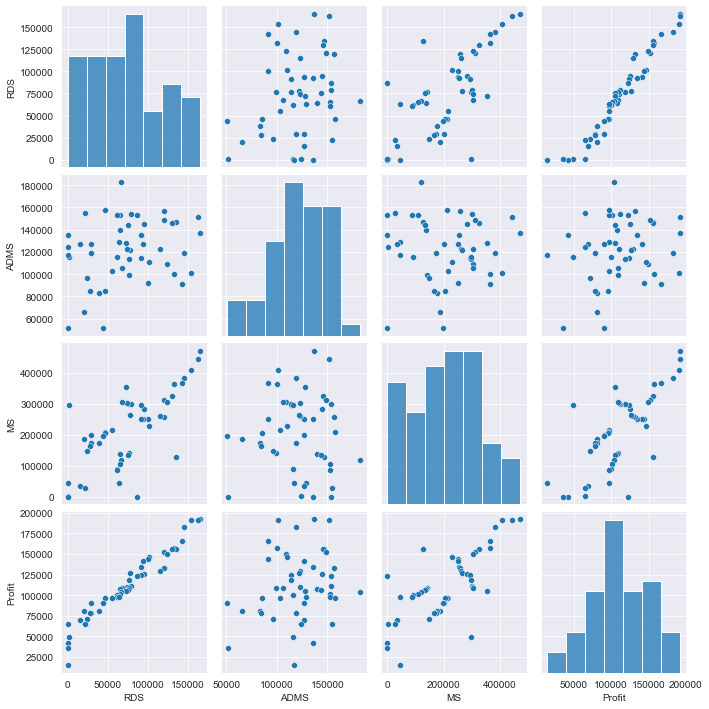

In [74]:
sns.set_style(style='darkgrid')
sns.pairplot(startup2)

# Building Model

In [75]:
model = smf.ols('Profit~RDS+ADMS+MS', data=startup2).fit()

# Model Testing

In [76]:
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MS               0.027228
dtype: float64

In [77]:
model.tvalues, '/n', np.round(model.pvalues,6)

(Intercept     7.626218
 RDS          17.846374
 ADMS         -0.525507
 MS            1.655077
 dtype: float64,
 '/n',
 Intercept    0.000000
 RDS          0.000000
 ADMS         0.601755
 MS           0.104717
 dtype: float64)

In [78]:
model.rsquared, model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

Above pvalues of Admin and MS are greater than 0.05(alpha)

In [79]:
#Run SLR and MLR to see the significance of the ADMIS and MS

In [80]:
slr_a= smf.ols('Profit~ADMS', data=startup2).fit()

In [81]:
slr_a.tvalues,'/n', slr_a.pvalues #ADMS variable is in-significant 

(Intercept    3.040044
 ADMS         1.419493
 dtype: float64,
 '/n',
 Intercept    0.003824
 ADMS         0.162217
 dtype: float64)

In [83]:
slr_ms = smf.ols('Profit~MS', data=startup2).fit()

In [86]:
slr_ms.tvalues,'/n', np.round(slr_ms.pvalues,5) #MS variable is significant 

(Intercept    7.808356
 MS           7.802657
 dtype: float64,
 '/n',
 Intercept    0.0
 MS           0.0
 dtype: float64)

In [88]:
mlr_am = smf.ols('Profit~MS+ADMS', data=startup1).fit()

In [90]:
mlr_am.tvalues,'/n' , np.round(mlr_am.pvalues,5)

(Intercept    1.142741
 MS           8.281039
 ADMS         2.467779
 dtype: float64,
 '/n',
 Intercept    0.25893
 MS           0.00000
 ADMS         0.01729
 dtype: float64)

# Model validation

In [96]:
#collinearity check
rsq_rds = smf.ols('RDS~ADMS+MS', data=startup2).fit().rsquared
vif_rds = 1/(1-rsq_rds)

rsq_ms = smf.ols('MS~ADMS+RDS', data=startup2).fit().rsquared
vif_ms = 1/(1-rsq_ms)

rsq_adms = smf.ols('ADMS~MS+RDS', data=startup2).fit().rsquared
vif_adms= 1/(1-rsq_adms)

In [105]:
df={'Variables': ['RDS','MS','ADMS'],
                  'VIF': [vif_rds, vif_ms, vif_adms]}
df

{'Variables': ['RDS', 'MS', 'ADMS'],
 'VIF': [2.4689030699947017, 2.3267732905308773, 1.1750910070550455]}

In [106]:
pd.DataFrame(df)

,Variables,VIF
0,RDS,2.468903
1,MS,2.326773
2,ADMS,1.175091


 As none of the VIF is greater than 20, it concludes that there is no collinearity 

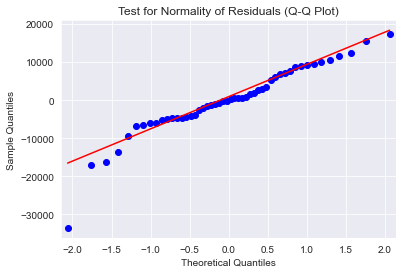

In [109]:
# 2. Residual analysis
#qq plot
qq_plot=sm.qqplot(model.resid,line='q')
plt.title('Test for Normality of Residuals (Q-Q Plot)')
plt.show()

In [113]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

# Residual Plot for Homoscedasticity

In [131]:
def get_standardized_values(vals):
    return (vals-vals.mean())/(vals.std())

Text(0, 0.5, 'Standardized residual values')

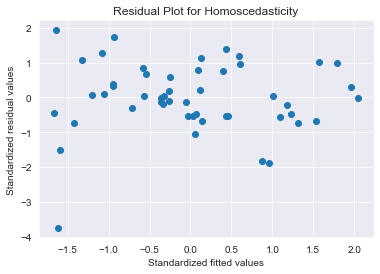

In [132]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.title('Residual Plot for Homoscedasticity')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')

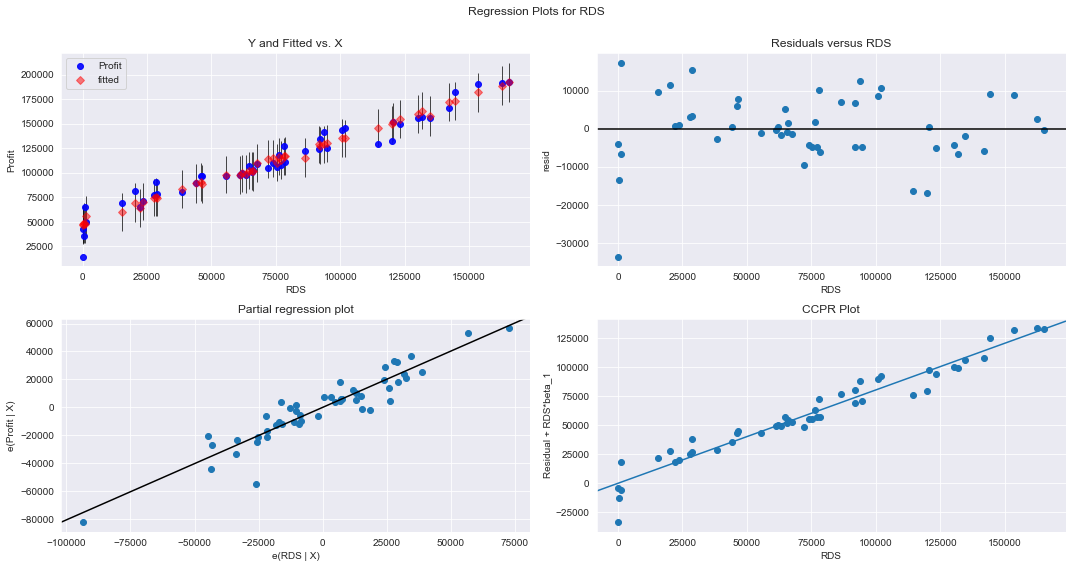

In [136]:
# Residuals vs Regressors
fig =plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

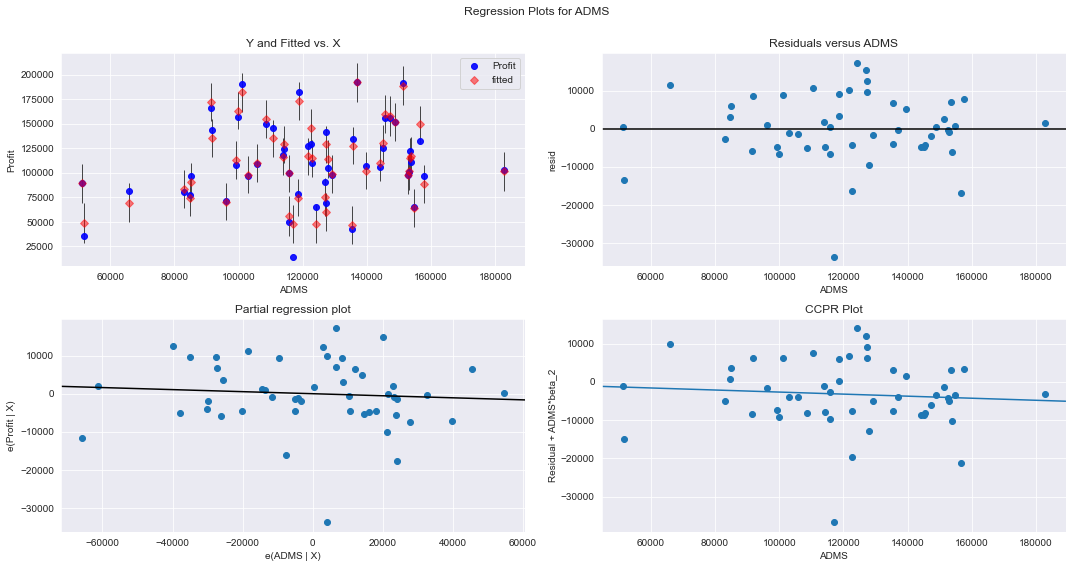

In [137]:
fig =plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "ADMS", fig=fig)
plt.show()

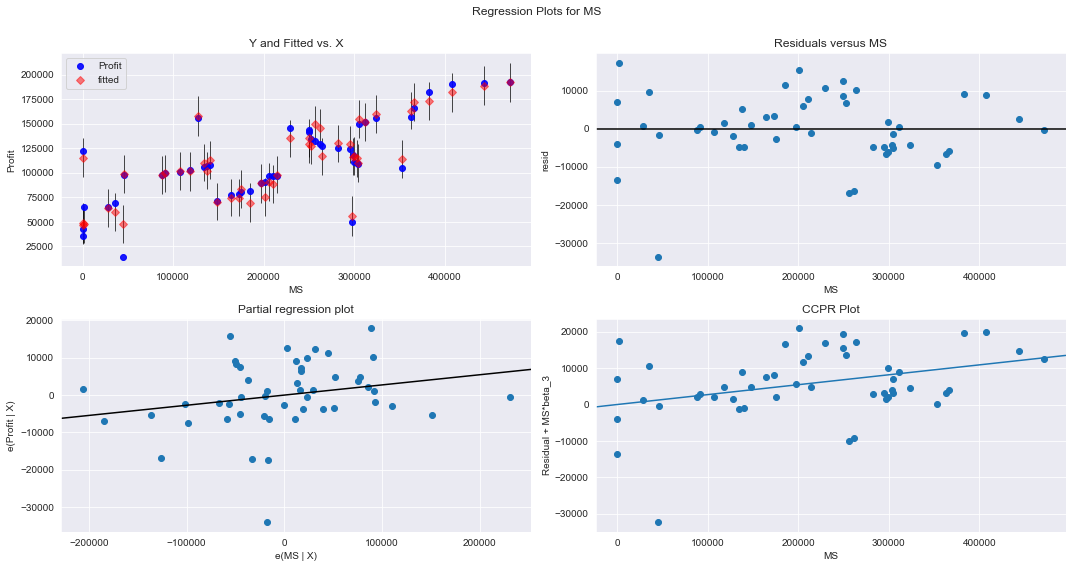

In [138]:
fig =plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Outliers and influencers

## Cooks Distance

In [141]:
model_influence = model.get_influence()
(c, _)= model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

<StemContainer object of 3 artists>

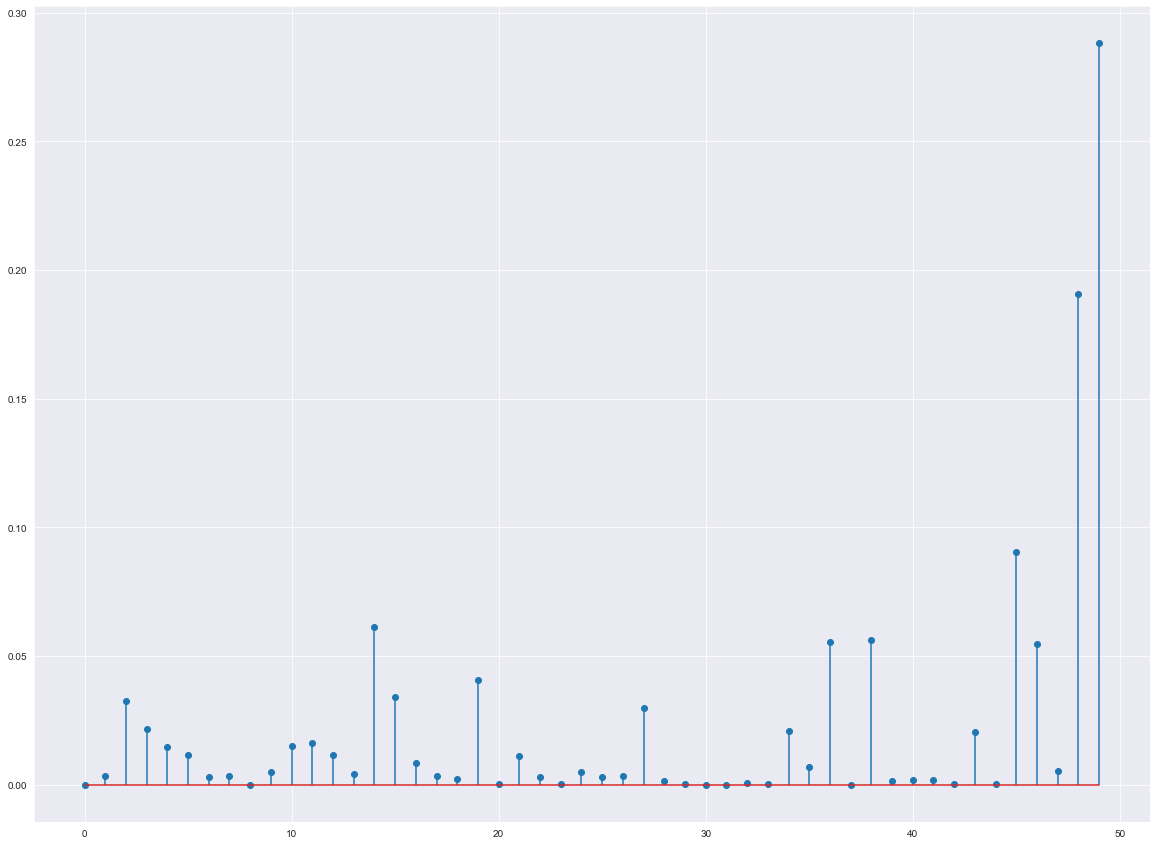

In [145]:
# Plot the influencers using stemplot 
plt.figure(figsize=(20,15))
plt.stem(np.arange(len(startup2)), np.round(c,5))

In [146]:
#index and value of the influencer 
np.argmax(c), np.max(c)

(49, 0.28808229275432623)

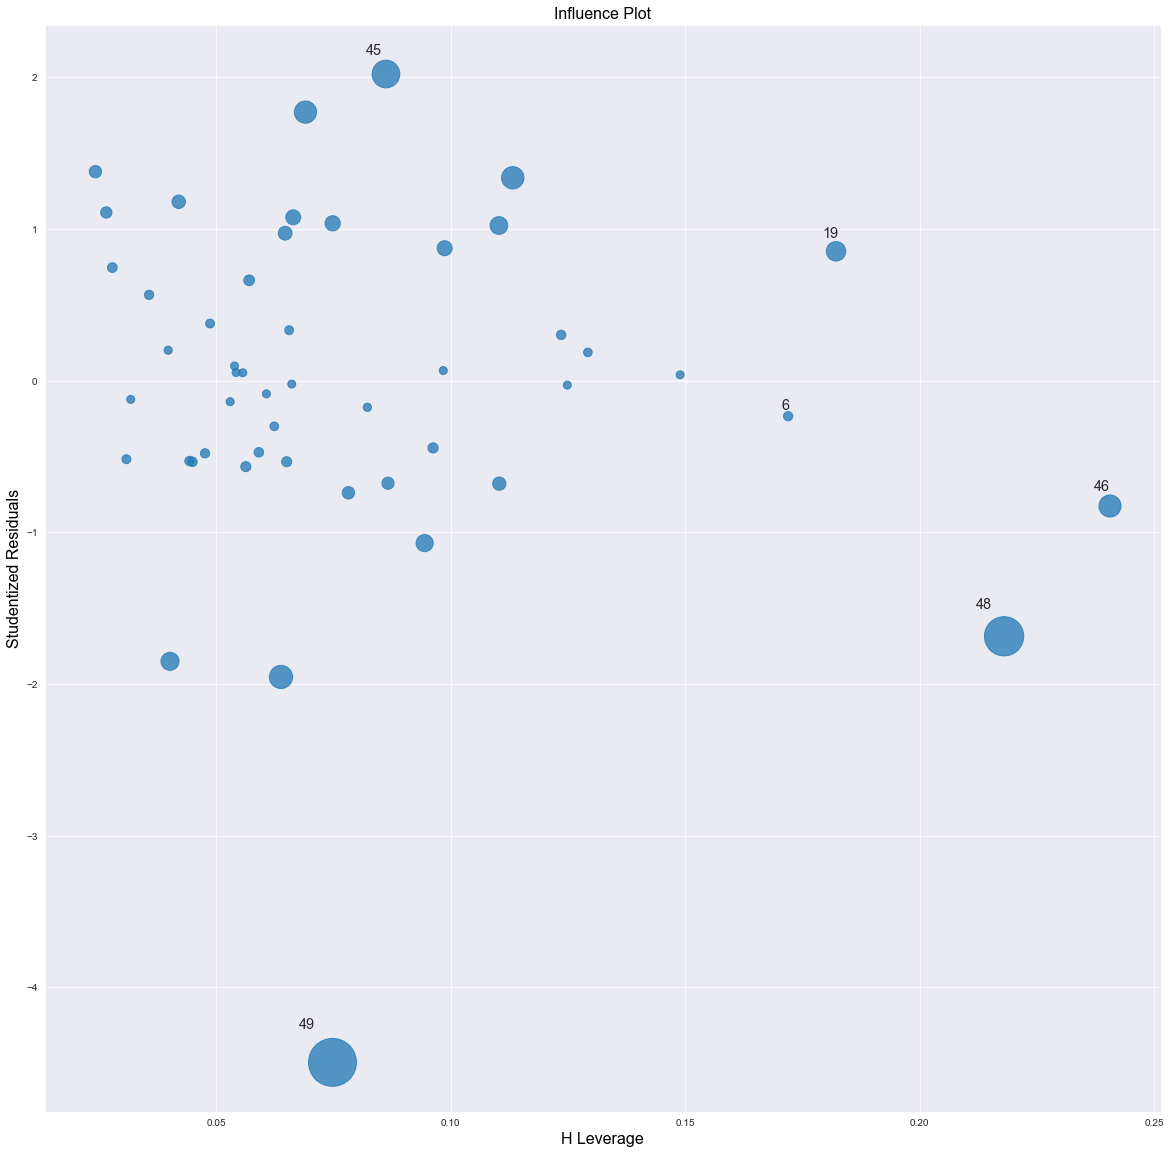

In [151]:
#leverage value using influence plot
fig,ax= plt.subplots(figsize=(20,20))
influence_plot(model, ax=ax)
plt.show()

In [153]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=startup2.shape[1]
n=startup2.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.3

In [155]:
startup2[startup2.index.isin([49])]

,RDS,ADMS,MS,Profit
49,0.0,116983.8,45173.06,14681.4


## Improving the model

In [157]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
Startup3=startup2.drop(Startup2.index[[49]],axis=0).reset_index(drop=True)
Startup3

,RDS,ADMS,MS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


## Model Deletion Diagnostics and Final Model

In [160]:
model2=smf.ols("Profit~RDS+ADMS+MS",data=Startup3).fit()

In [163]:
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols("Profit~RDS+ADMS+MS",data=Startup3).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        Startup3=Startup3.drop(Startup3.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        Startup3
    else:
        final_model=smf.ols("Profit~RDS+ADMS+MS",data=Startup3).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9626766170294073
Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209413
Thus model accuracy is improved to 0.9663901957918793
Thus model accuracy is improved to 0.9706076169779905
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090916
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.983114992639277
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improved to 0.98771919355472
Thus model accuracy is improved 

In [164]:
final_model.rsquared

0.9882757054424702

In [165]:
Startup3

,RDS,ADMS,MS,Profit
0,142107.34,91391.77,366168.42,166187.94
1,131876.90,99814.71,362861.36,156991.12
2,130298.13,145530.06,323876.68,155752.60
3,120542.52,148718.95,311613.29,152211.77
4,123334.88,108679.17,304981.62,149759.96
5,91992.39,135495.07,252664.93,134307.35
6,94657.16,145077.58,282574.31,125370.37
7,91749.16,114175.79,294919.57,124266.90
8,76253.86,113867.30,298664.47,118474.03
9,67532.53,105751.03,304768.73,108733.99


# Model Predictions

In [168]:
# say New data for prediction is
new_data=pd.DataFrame({'RDS':80000,"ADMS":80000,"MS":150000},index=[0])
new_data

,RDS,ADMS,MS
0,80000,80000,150000


In [169]:
final_model.predict(new_data)

0    112011.134787
dtype: float64

In [170]:
pred_y=final_model.predict(Startup3)
pred_y

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

# table containing R^2 value for each prepared model

In [171]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.988276
